In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot
import csv

import folium
import json
import os

import platform
from matplotlib import font_manager, rc

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

In [3]:
df_im = pd.read_csv('./Data/20.세종시_전입자수.csv')
df_ex = pd.read_csv('./Data/21.세종시_전출자수.csv')

### 데이터 전처리
* 데이터 전처리를 통해 연도별,월별 순전입자수를 계산

In [4]:
df_im['세종전입행정동'] = df_im['세종전입행정동'].astype('str')
df_ex['세종전출행정동'] = df_ex['세종전출행정동'].astype('str')

In [5]:
df_im['date'] = pd.to_datetime(df_im['년월'].astype('str'),format = '%Y%m')
df_ex['date'] = pd.to_datetime(df_ex['년월'].astype('str'),format = '%Y%m')

In [6]:
df_im['year'] = pd.to_datetime(df_im['date']).dt.to_period(freq = 'Y')
df_ex['year'] = pd.to_datetime(df_ex['date']).dt.to_period(freq = 'Y')

In [7]:
df_im['yearm'] = pd.to_datetime(df_im['date']).dt.to_period(freq = 'M')
df_ex['yearm'] = pd.to_datetime(df_ex['date']).dt.to_period(freq = 'M')

In [8]:
df_im_2017 = df_im[df_im['year'] == '2017']
df_im_2018 = df_im[df_im['year'] == '2018']
df_im_2019 = df_im[df_im['year'] == '2019']
df_im_2020 = df_im[df_im['year'] == '2020']
df_im_2021 = df_im[df_im['year'] == '2021']

In [9]:
df_ex_2017 = df_ex[df_ex['year'] == '2017']
df_ex_2018 = df_ex[df_ex['year'] == '2018']
df_ex_2019 = df_ex[df_ex['year'] == '2019']
df_ex_2020 = df_ex[df_ex['year'] == '2020']
df_ex_2021 = df_ex[df_ex['year'] == '2021']

In [10]:
df_im_2017 = df_im_2017.groupby(['yearm','년월','세종전입행정동'],as_index=False).sum()
df_im_2017 = df_im_2017.sort_values(by=['yearm','년월','세종전입행정동'],ascending=True)

df_im_2018 = df_im_2018.groupby(['yearm','년월','세종전입행정동'],as_index=False).sum()
df_im_2018 = df_im_2018.sort_values(by=['yearm','년월','세종전입행정동'],ascending=True)

df_im_2019 = df_im_2019.groupby(['yearm','년월','세종전입행정동'],as_index=False).sum()
df_im_2019 = df_im_2019.sort_values(by=['yearm','년월','세종전입행정동'],ascending=True)

df_im_2020 = df_im_2020.groupby(['yearm','년월','세종전입행정동'],as_index=False).sum()
df_im_2020 = df_im_2020.sort_values(by=['yearm','년월','세종전입행정동'],ascending=True)

df_im_2021 = df_im_2021.groupby(['yearm','년월','세종전입행정동'],as_index=False).sum()
df_im_2021 = df_im_2021.sort_values(by=['yearm','년월','세종전입행정동'],ascending=True)

In [11]:
df_ex_2017 = df_ex_2017.groupby(['yearm','년월','세종전출행정동'],as_index=False).sum()
df_ex_2017 = df_ex_2017.sort_values(by=['yearm','년월','세종전출행정동'],ascending=True)

df_ex_2018 = df_ex_2018.groupby(['yearm','년월','세종전출행정동'],as_index=False).sum()
df_ex_2018 = df_ex_2018.sort_values(by=['yearm','년월','세종전출행정동'],ascending=True)

df_ex_2019 = df_ex_2019.groupby(['yearm','년월','세종전출행정동'],as_index=False).sum()
df_ex_2019 = df_ex_2019.sort_values(by=['yearm','년월','세종전출행정동'],ascending=True)

df_ex_2020 = df_ex_2020.groupby(['yearm','년월','세종전출행정동'],as_index=False).sum()
df_ex_2020 = df_ex_2020.sort_values(by=['yearm','년월','세종전출행정동'],ascending=True)

df_ex_2021 = df_ex_2021.groupby(['yearm','년월','세종전출행정동'],as_index=False).sum()
df_ex_2021 = df_ex_2021.sort_values(by=['yearm','년월','세종전출행정동'],ascending=True)

In [12]:
df_2017 = pd.concat([df_im_2017,df_ex_2017['전출자수']],axis=1)
df_2017 = df_2017.fillna(0)
df_2017['순전입자수'] = df_2017['전입자수']-df_2017['전출자수']
df_2017['month'] = df_2017['yearm'].dt.month

df_2018 = pd.concat([df_im_2018,df_ex_2018['전출자수']],axis=1)
df_2018 = df_2018.fillna(0)
df_2018['순전입자수'] = df_2018['전입자수']-df_2018['전출자수']
df_2018['month'] = df_2018['yearm'].dt.month

df_2019 = pd.concat([df_im_2019,df_ex_2019['전출자수']],axis=1)
df_2019 = df_2019.fillna(0)
df_2019['순전입자수'] = df_2019['전입자수']-df_2019['전출자수']
df_2019['month'] = df_2019['yearm'].dt.month

df_2020 = pd.concat([df_im_2020,df_ex_2020['전출자수']],axis=1)
df_2020 = df_2020.fillna(0)
df_2020['순전입자수'] = df_2020['전입자수']-df_2020['전출자수']
df_2020['month'] = df_2020['yearm'].dt.month

df_2021 = pd.concat([df_im_2021,df_ex_2021['전출자수']],axis=1)
df_2021 = df_2021.fillna(0)
df_2021['순전입자수'] = df_2021['전입자수']-df_2021['전출자수']
df_2021['month'] = df_2021['yearm'].dt.month

* 새롬동의 경우 2017년 10월에 출범하였는데 2017년 7,8월에 전입자, 전출자 데이터가 있었기 때문에 이상치로 간주하여 제거

In [13]:
df_2017[df_2017['세종전입행정동'] == '새롬동']

,yearm,년월,세종전입행정동,전입자수,전출자수,순전입자수,month
99,2017-07,201707,새롬동,11,225.0,-214.0,7
116,2017-08,201708,새롬동,12,1517.0,-1505.0,8
149,2017-10,201710,새롬동,5001,1296.0,3705.0,10
166,2017-11,201711,새롬동,5300,1358.0,3942.0,11
183,2017-12,201712,새롬동,5607,1526.0,4081.0,12


In [14]:
df_2017 = df_2017.drop([df_2017.index[99],df_2017.index[116]])

* 고운동, 도담동, 종촌동, 새롬동의 연도별 순전입자수, 전입자수, 전출자수 상위 5개 월을 확인 

In [15]:
# df_2017[df_2017['세종전입행정동'] == '새롬동'].sort_values(by='전출자수',ascending=False).head()
# #고운동 도담동 종촌동 새롬동 

,yearm,년월,세종전입행정동,전입자수,전출자수,순전입자수,month
183,2017-12,201712,새롬동,5607,1526.0,4081.0,12
166,2017-11,201711,새롬동,5300,1358.0,3942.0,11
149,2017-10,201710,새롬동,5001,1296.0,3705.0,10


In [21]:
# df_2018[df_2018['세종전입행정동'] == '새롬동'].sort_values(by='전출자수',ascending=False).head()

,yearm,년월,세종전입행정동,전입자수,전출자수,순전입자수,month
108,2018-07,201807,새롬동,12240,5437.0,6803.0,7
73,2018-05,201805,새롬동,14358,3083.0,11275.0,5
90,2018-06,201806,새롬동,13848,2768.0,11080.0,6
56,2018-04,201804,새롬동,23302,2646.0,20656.0,4
22,2018-02,201802,새롬동,15050,2002.0,13048.0,2


In [22]:
# df_2019[df_2019['세종전입행정동'] == '새롬동'].sort_values(by='전출자수',ascending=False).head()

,yearm,년월,세종전입행정동,전입자수,전출자수,순전입자수,month
139,2019-08,201908,새롬동,7195,4813,2382,8
177,2019-10,201910,새롬동,8363,4190,4173,10
120,2019-07,201907,새롬동,11050,4183,6867,7
158,2019-09,201909,새롬동,7506,3818,3688,9
215,2019-12,201912,새롬동,5716,3679,2037,12


In [23]:
# df_2020[df_2020['세종전입행정동'] == '새롬동'].sort_values(by='전출자수',ascending=False).head()

,yearm,년월,세종전입행정동,전입자수,전출자수,순전입자수,month
25,2020-02,202002,새롬동,8149,6406.0,1743.0,2
101,2020-06,202006,새롬동,5113,5045.0,68.0,6
82,2020-05,202005,새롬동,4605,4826.0,-221.0,5
44,2020-03,202003,새롬동,5590,4779.0,811.0,3
6,2020-01,202001,새롬동,6544,4757.0,1787.0,1


In [16]:
df_list = [df_2017,df_2018,df_2019,df_2020,df_2021]
for i in range(len(df_list)):
    print(df_list[i]['세종전입행정동'].unique())
    print(len(df_list[i]['세종전입행정동'].unique()))

['금남면' '도담동' '부강면' '소정면' '아름동' '연기면' '연동면' '연서면' '장군면' '전동면' '전의면' '조치원읍'
 '종촌동' '한솔동' '고운동' '보람동' '새롬동']
17
['고운동' '금남면' '도담동' '보람동' '부강면' '새롬동' '소정면' '아름동' '연기면' '연동면' '연서면' '장군면'
 '전동면' '전의면' '조치원읍' '종촌동' '한솔동' '대평동' '소담동' '다정동']
20
['고운동' '금남면' '대평동' '도담동' '보람동' '부강면' '새롬동' '소담동' '소정면' '아름동' '연기면' '연동면'
 '연서면' '장군면' '전동면' '전의면' '조치원읍' '종촌동' '한솔동']
19
['고운동' '금남면' '대평동' '도담동' '보람동' '부강면' '새롬동' '소담동' '소정면' '아름동' '연기면' '연동면'
 '연서면' '장군면' '전동면' '전의면' '조치원읍' '종촌동' '한솔동' '다정동']
20
['고운동' '금남면' '다정동' '대평동' '도담동' '보람동' '부강면' '새롬동' '소담동' '소정면' '아름동' '연기면'
 '연동면' '연서면' '장군면' '전동면' '전의면' '조치원읍' '종촌동' '한솔동']
20


### 데이터 시각화
* 전처리한 데이터를 통해 순전입자수, 전입자수, 전출자수를 행정동별로 막대그래프 및 추세선을 통해 시각화

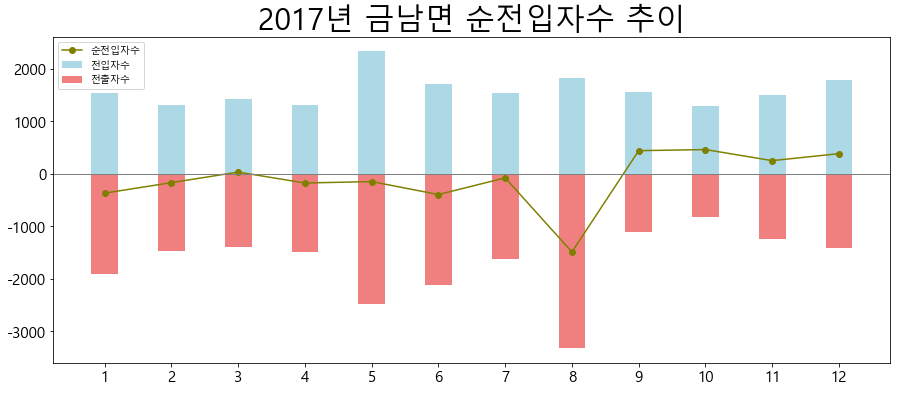

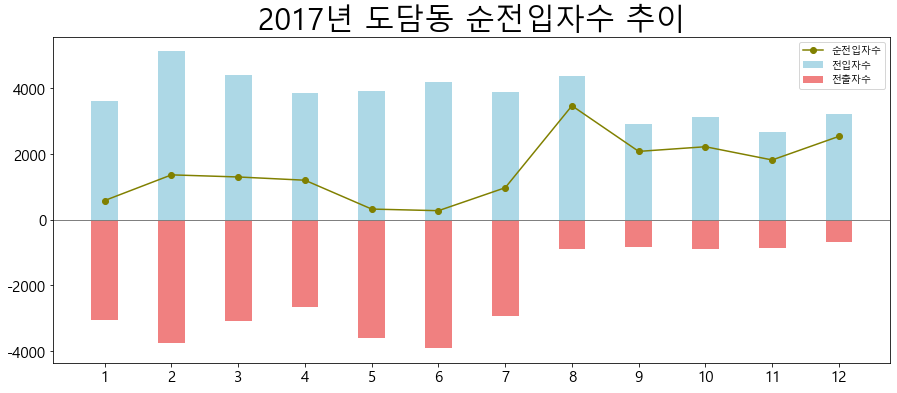

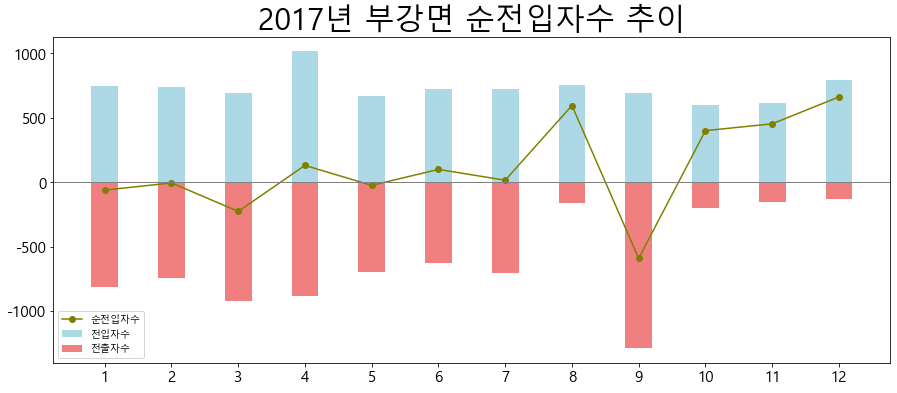

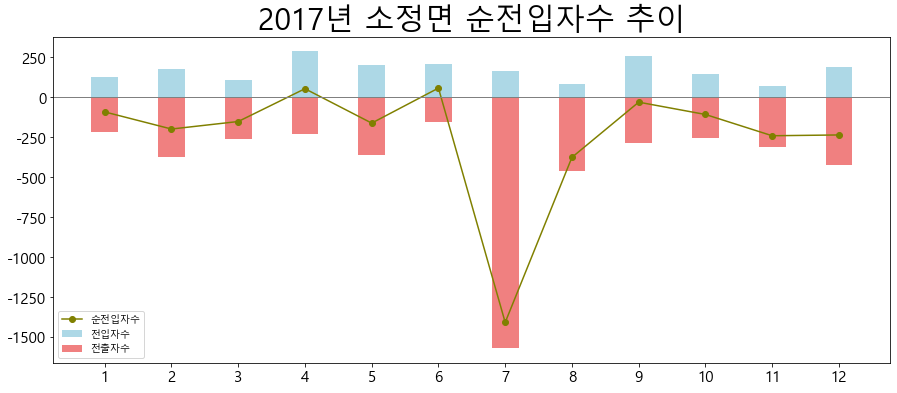

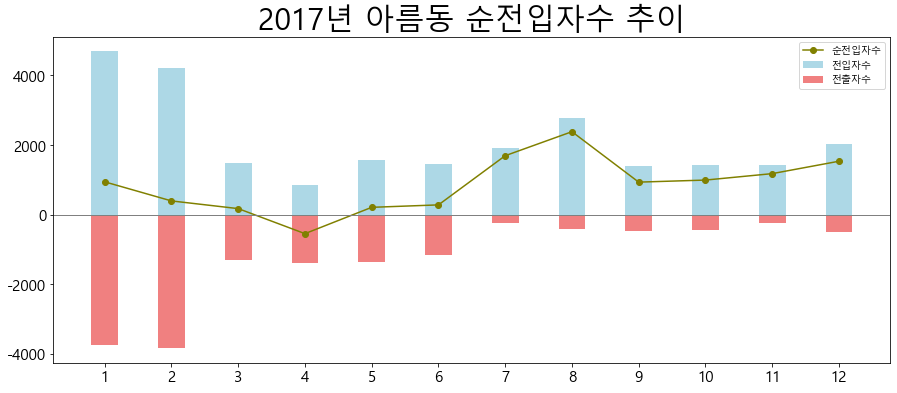

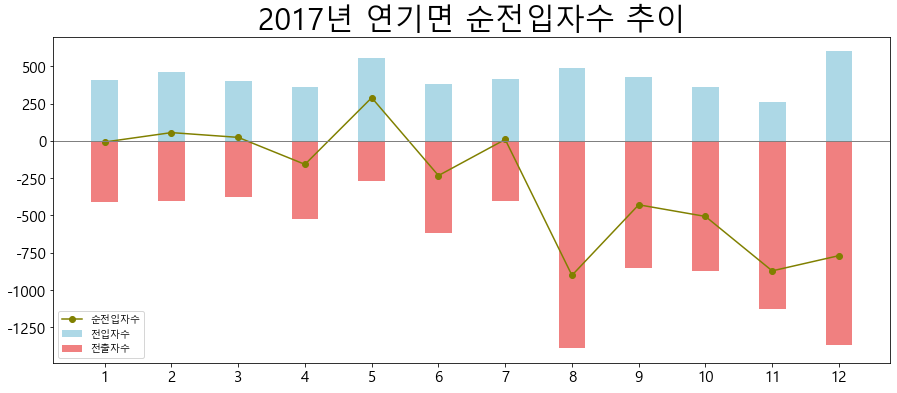

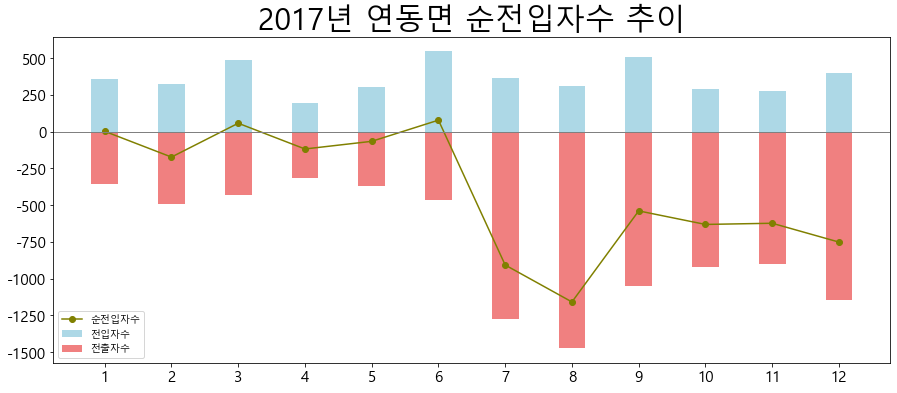

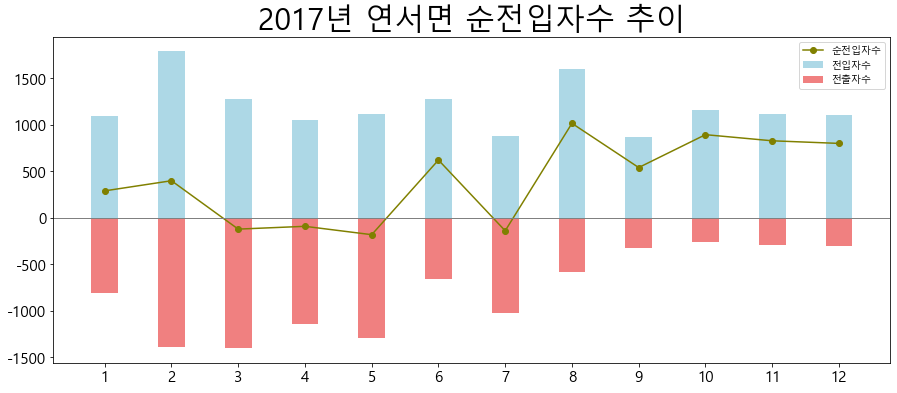

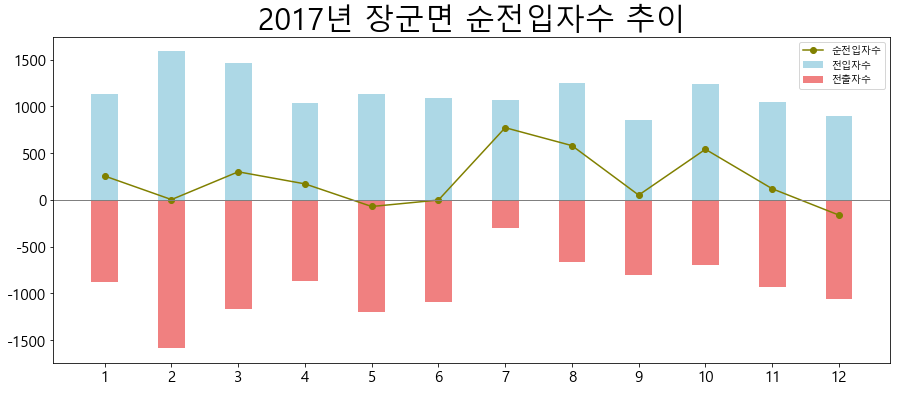

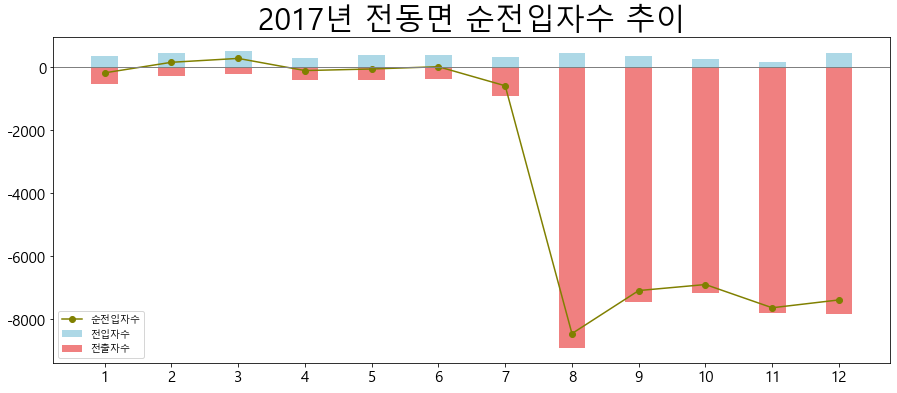

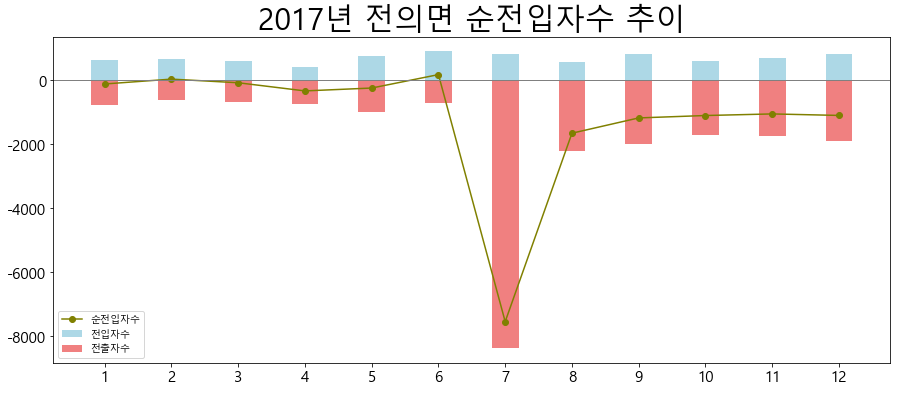

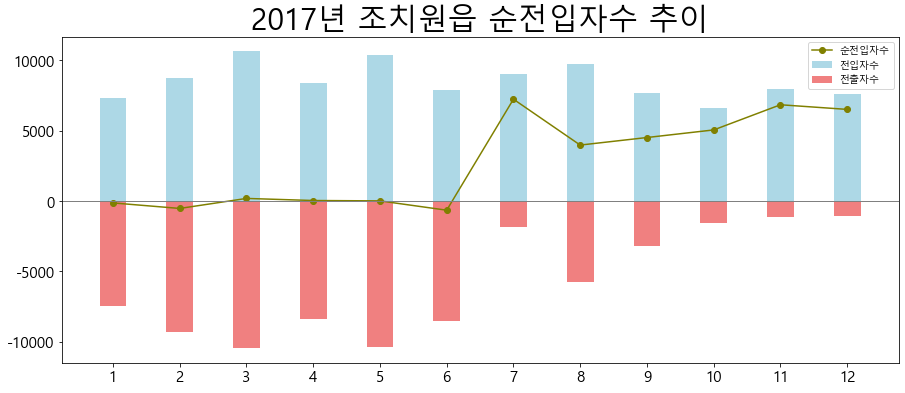

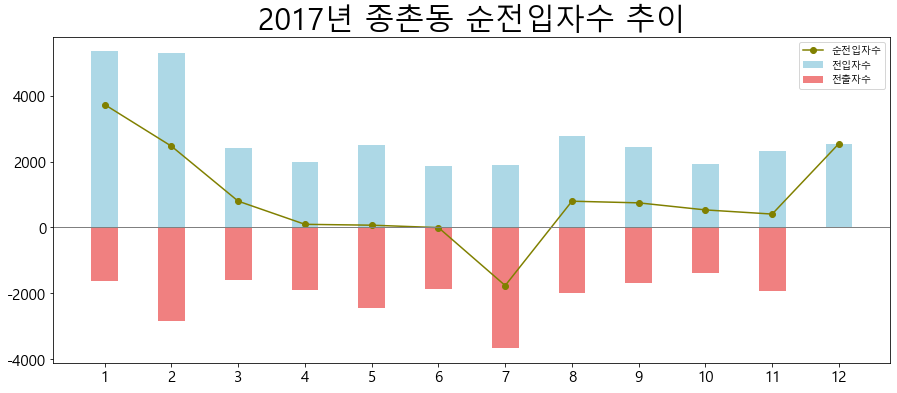

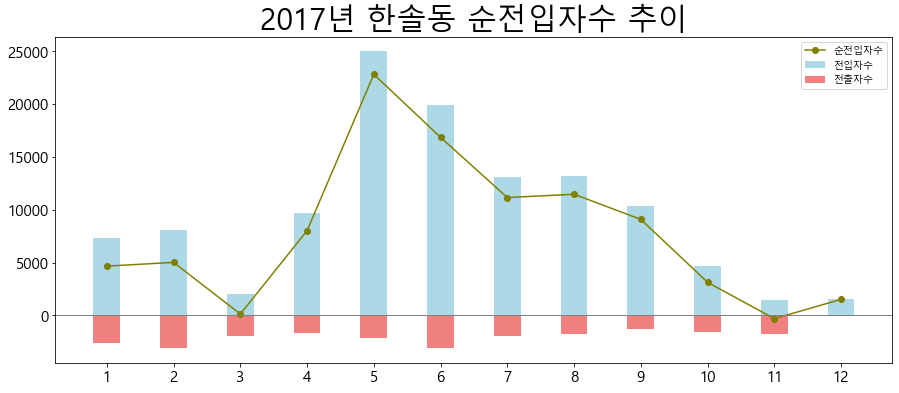

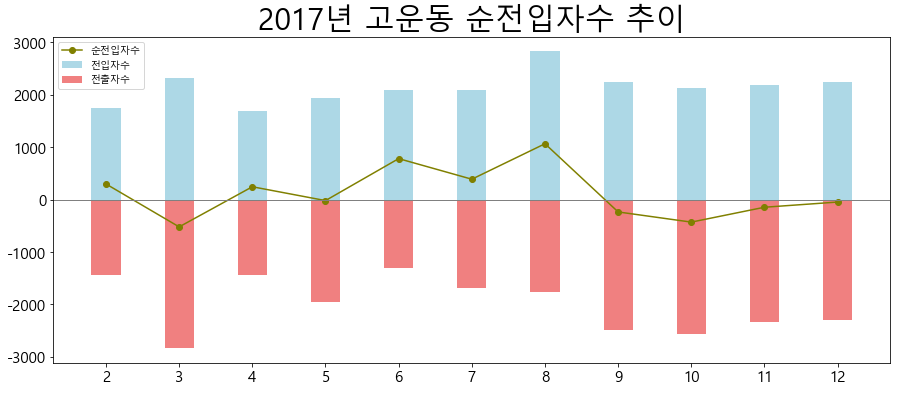

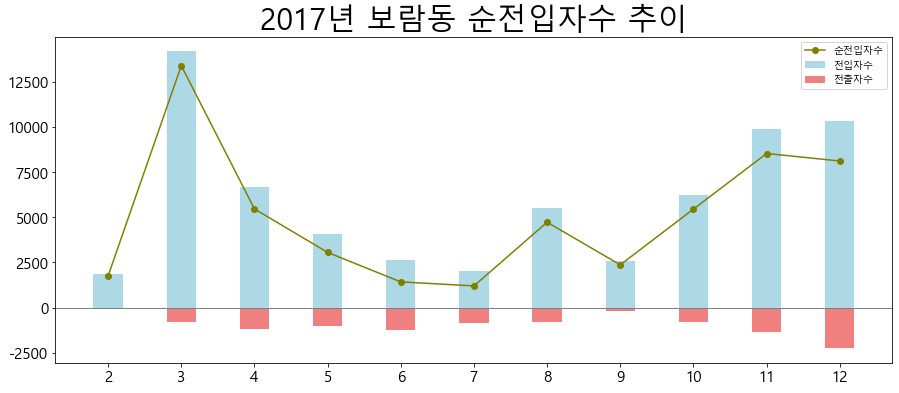

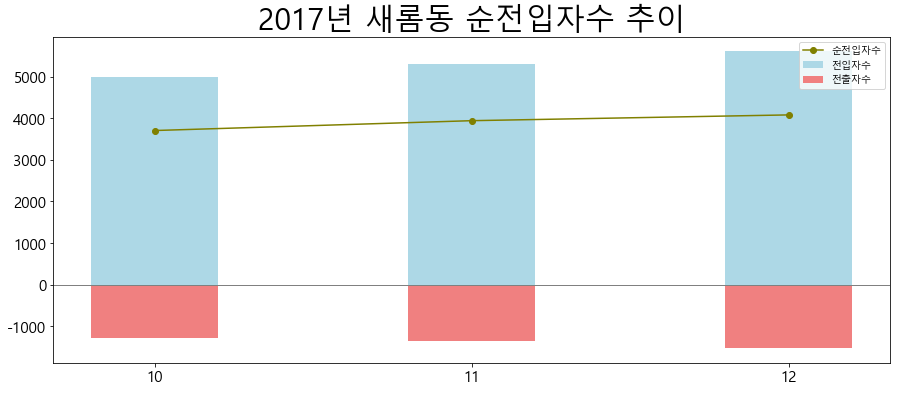

In [17]:
loc_list = ['금남면', '도담동', '부강면', '소정면', '아름동', '연기면', '연동면', '연서면', '장군면',
            '전동면', '전의면', '조치원읍', '종촌동', '한솔동', '고운동', '보람동', '새롬동']

for i,v in enumerate(loc_list):
    df_i = df_2017[df_2017['세종전입행정동'] == v]
    pyplot.figure(figsize=(15,6))
    pyplot.bar(df_i['month'],df_i['전입자수'],color='lightblue',label='전입자수',width=0.4)
    pyplot.bar(df_i['month'],-df_i['전출자수'],color='lightcoral',label='전출자수',width=0.4)
    pyplot.plot(df_i['month'],df_i['순전입자수'],color='olive',label='순전입자수',marker='o')
    plt.axhline(y=0, color='gray', linewidth=1)
    plt.xticks(df_i['month'],fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend()
    plt.title('2017년 {} 순전입자수 추이'.format(v),fontsize=30)
    plt.show()

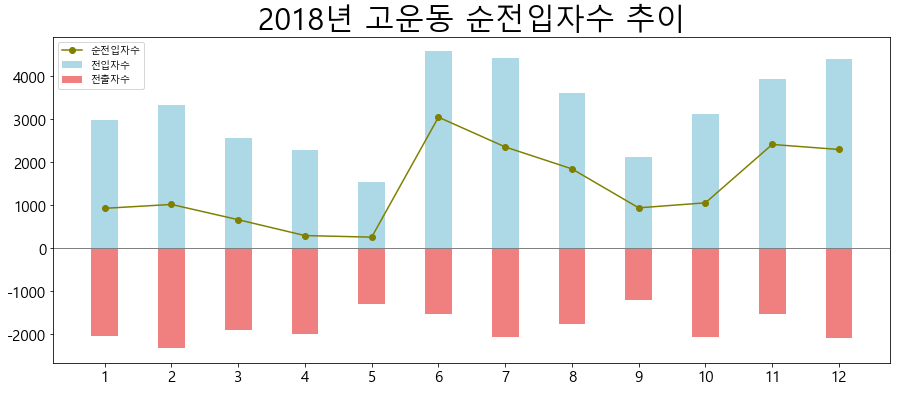

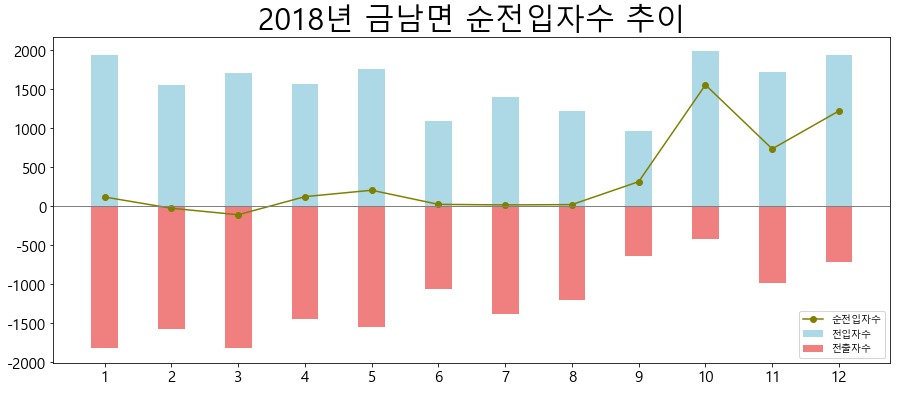

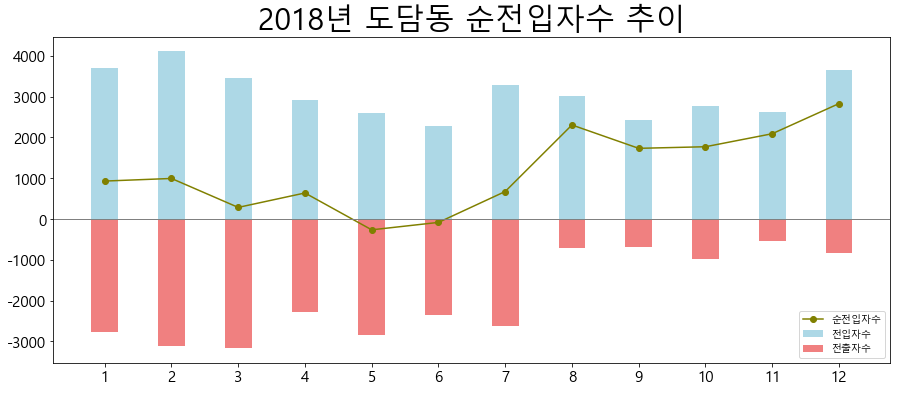

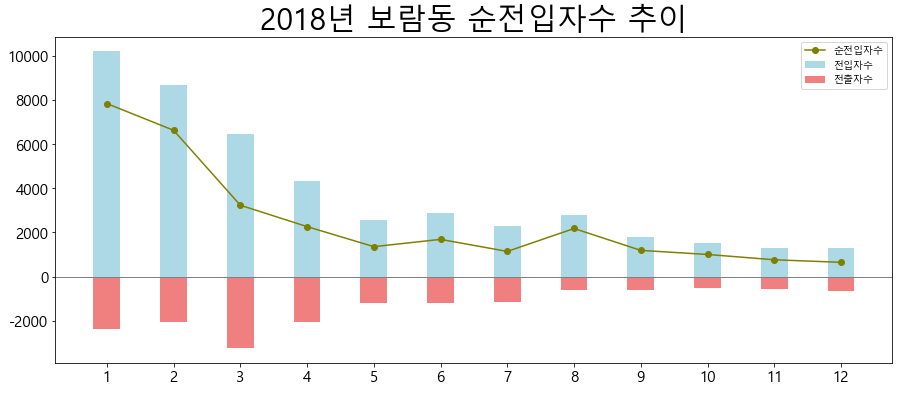

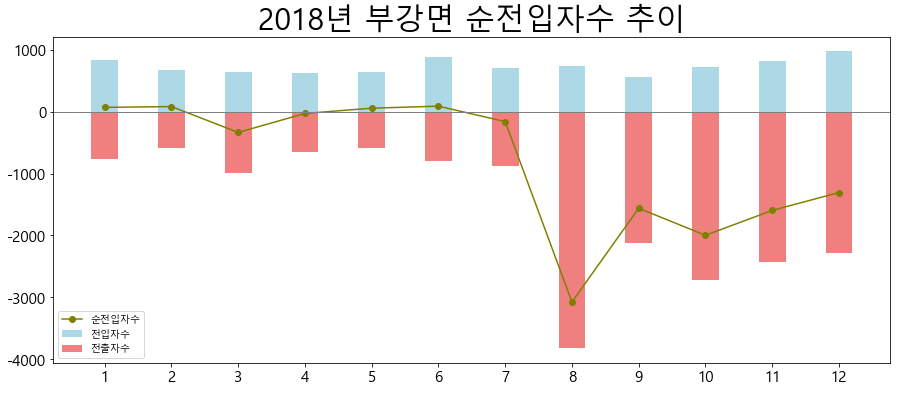

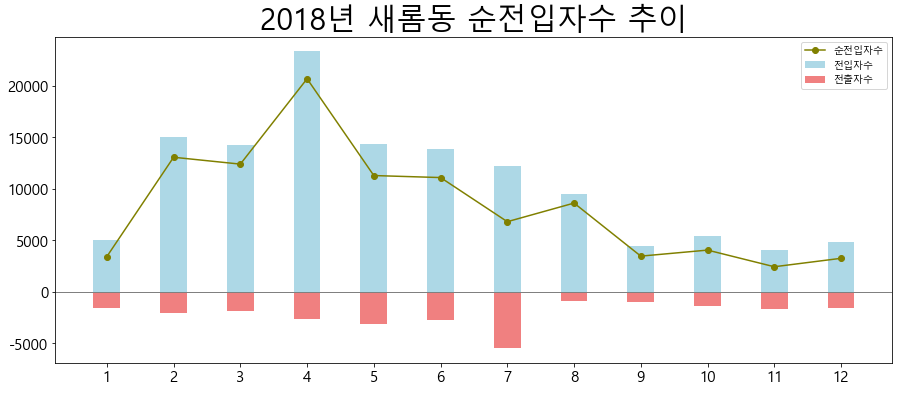

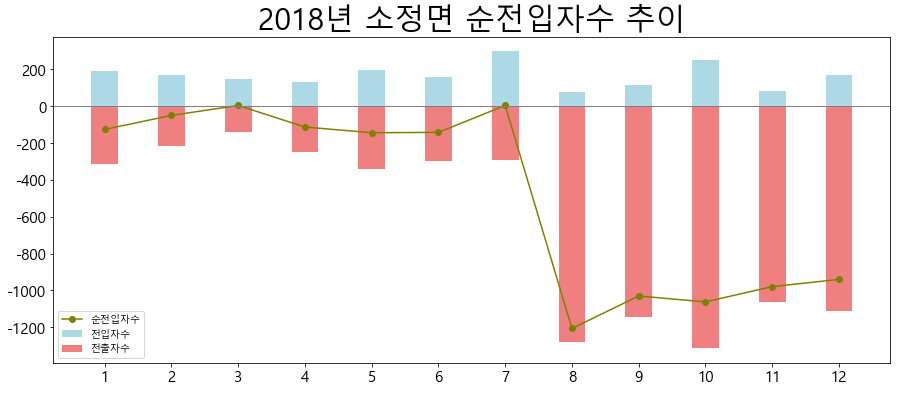

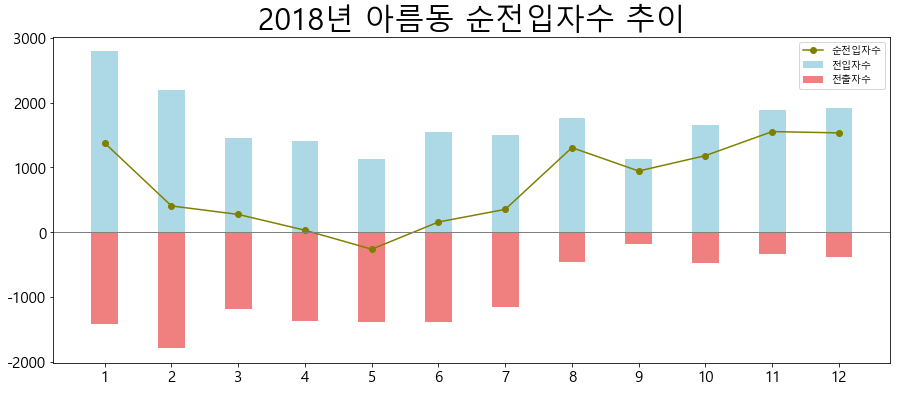

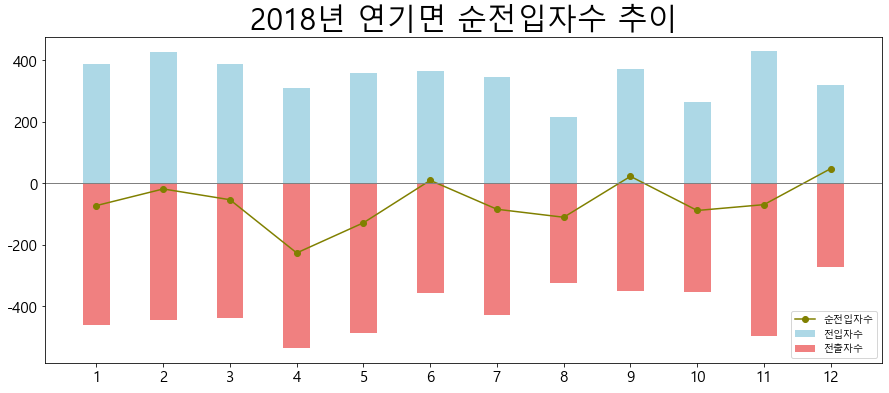

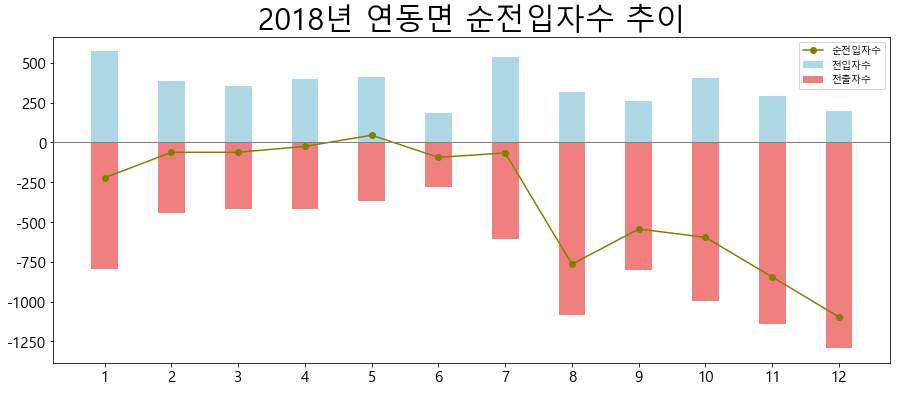

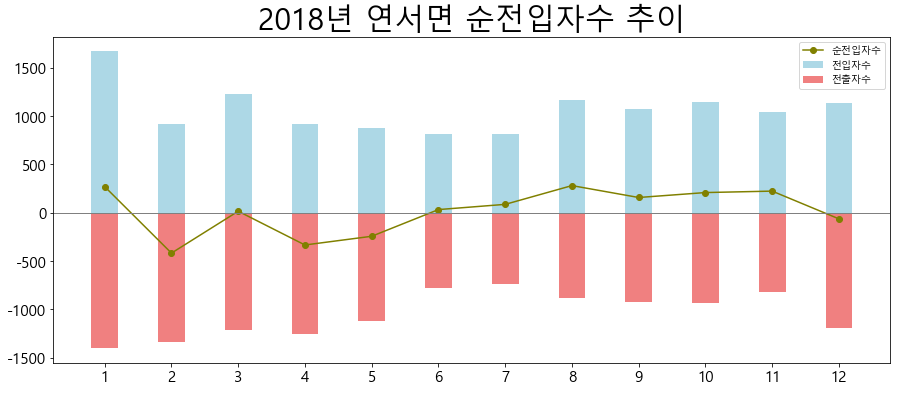

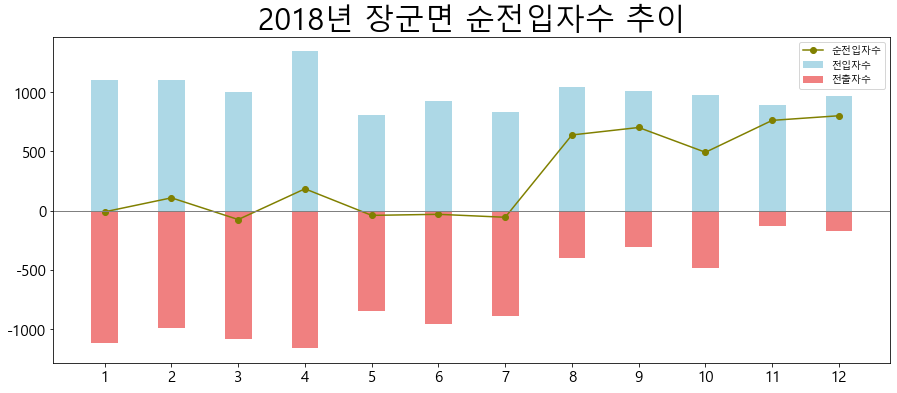

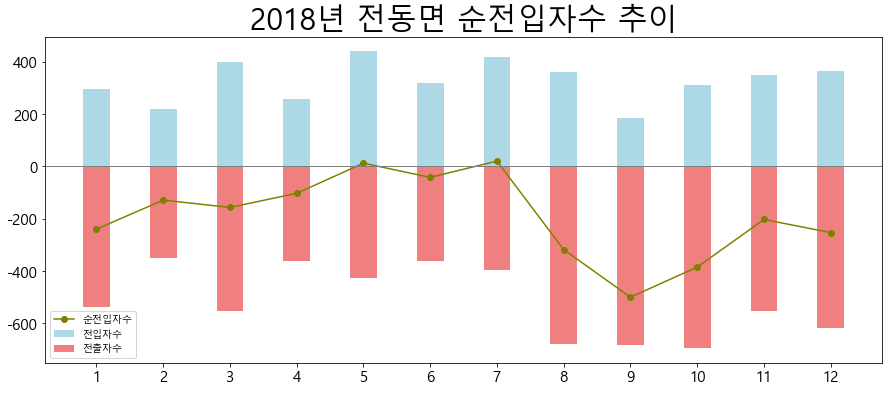

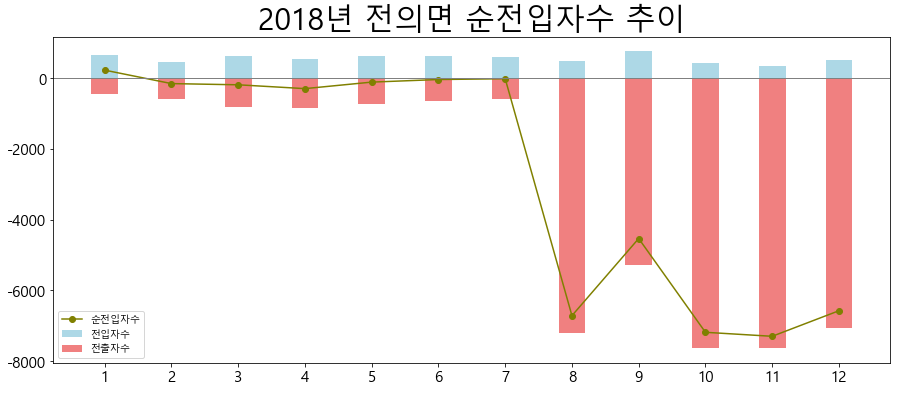

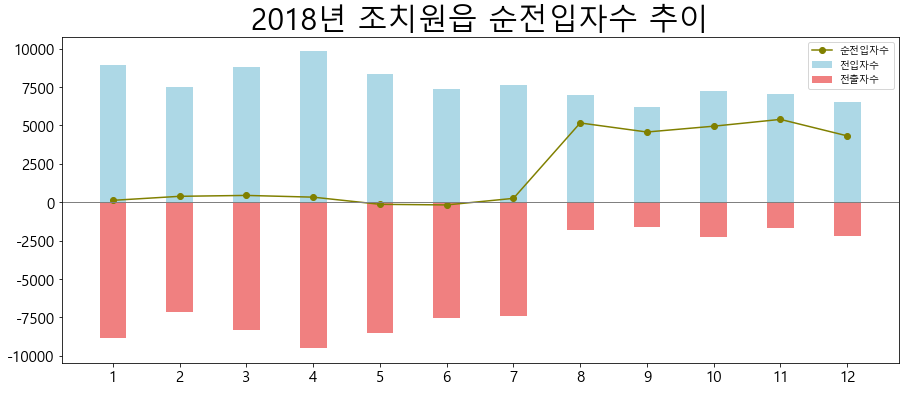

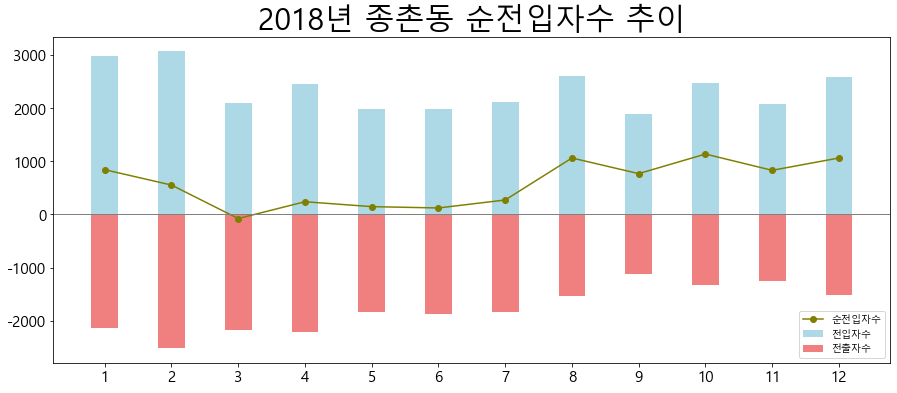

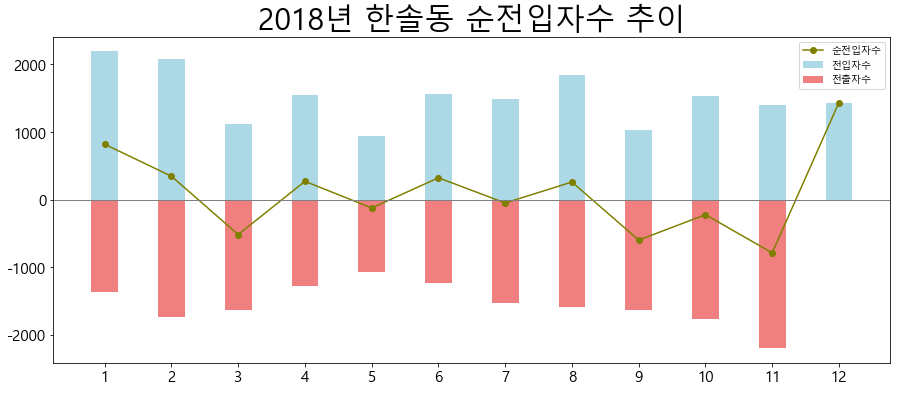

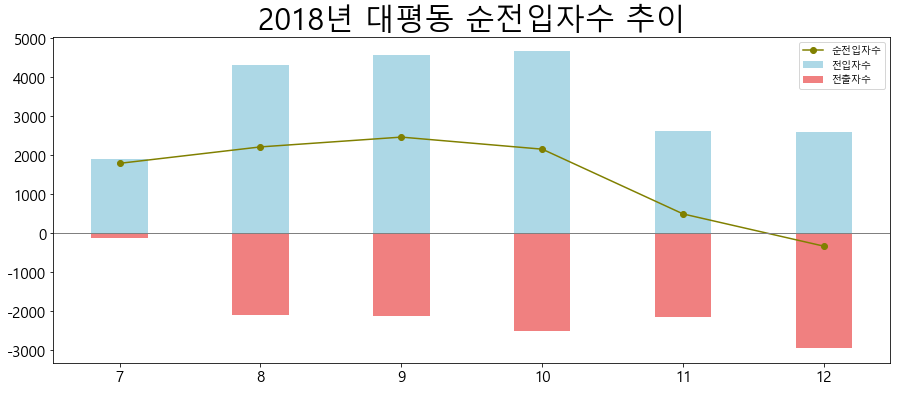

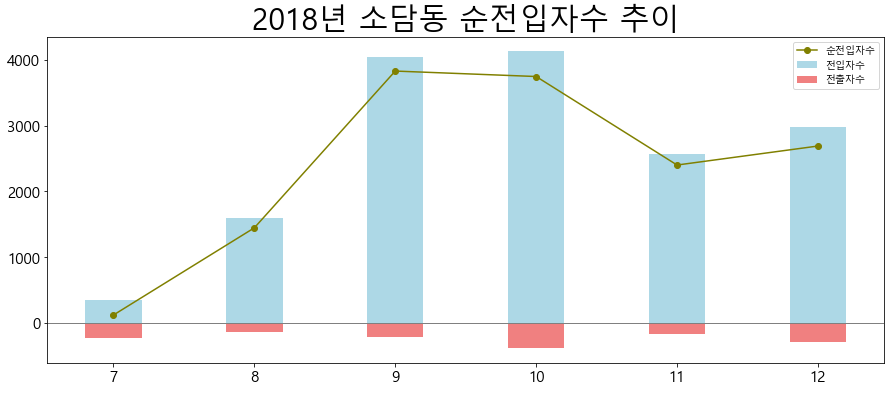

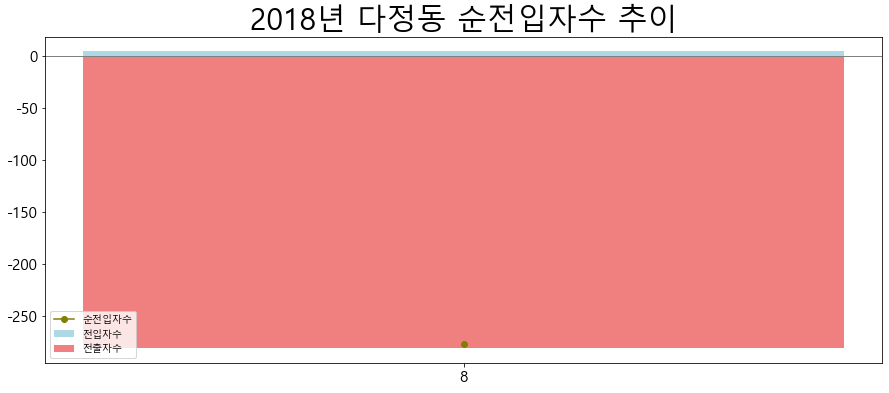

In [82]:
loc_list = ['고운동', '금남면', '도담동', '보람동', '부강면', '새롬동', '소정면', '아름동', '연기면',
            '연동면', '연서면', '장군면', '전동면', '전의면', '조치원읍', '종촌동',
            '한솔동', '대평동', '소담동', '다정동']

for i,v in enumerate(loc_list):
    df_i = df_2018[df_2018['세종전입행정동'] == v]
    pyplot.figure(figsize=(15,6))
    pyplot.bar(df_i['month'],df_i['전입자수'],color='lightblue',label='전입자수',width=0.4)
    pyplot.bar(df_i['month'],-df_i['전출자수'],color='lightcoral',label='전출자수',width=0.4)
    pyplot.plot(df_i['month'],df_i['순전입자수'],color='olive',label='순전입자수',marker='o')
    plt.axhline(y=0, color='gray', linewidth=1)
    plt.xticks(df_i['month'],fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend()
    plt.title('2018년 {} 순전입자수 추이'.format(v),fontsize=30)
    plt.show()

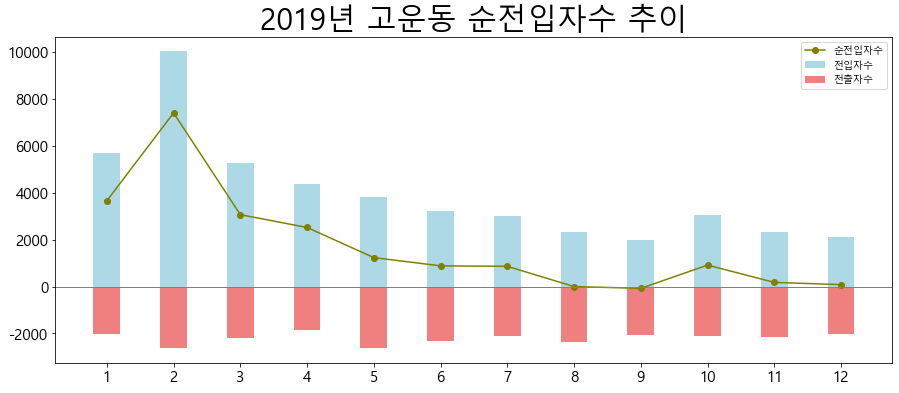

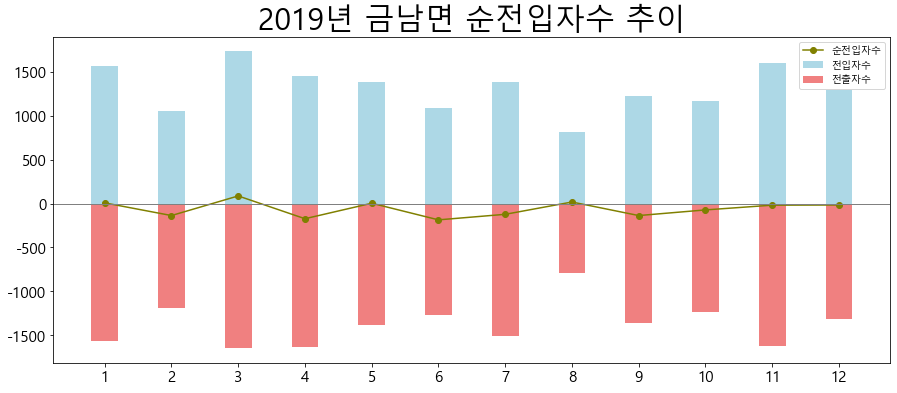

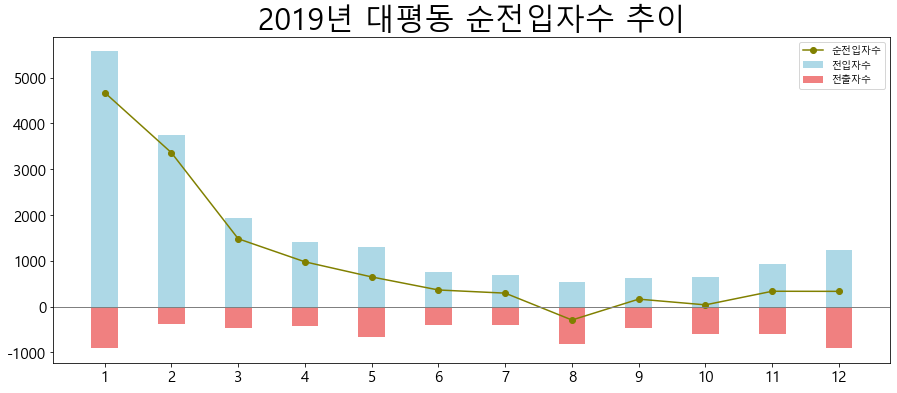

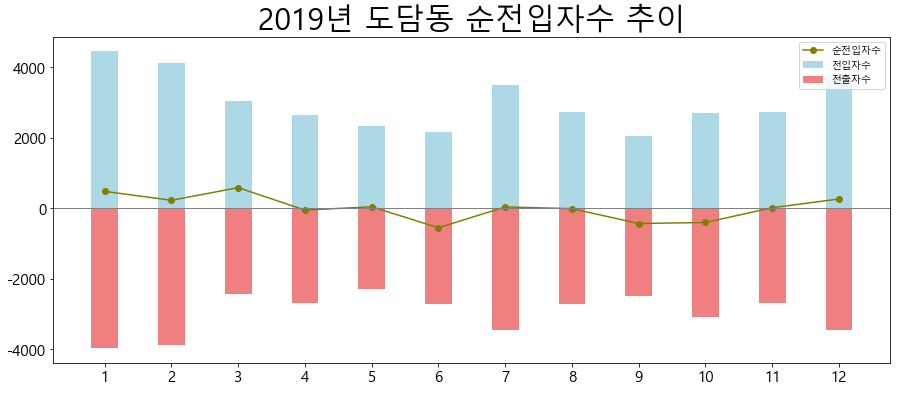

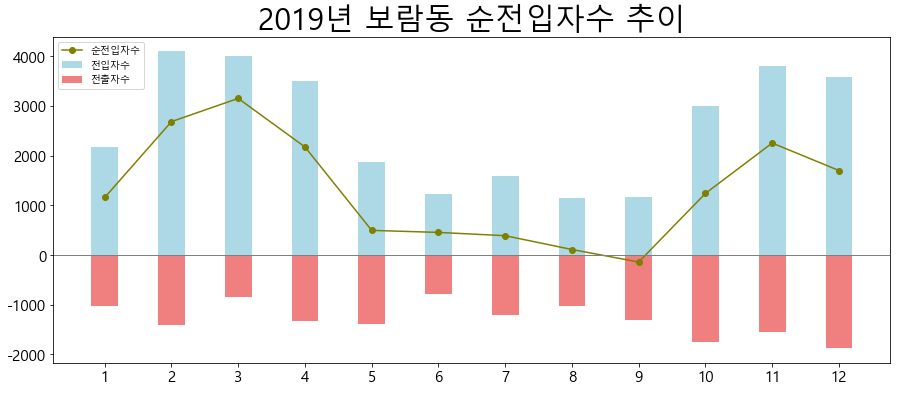

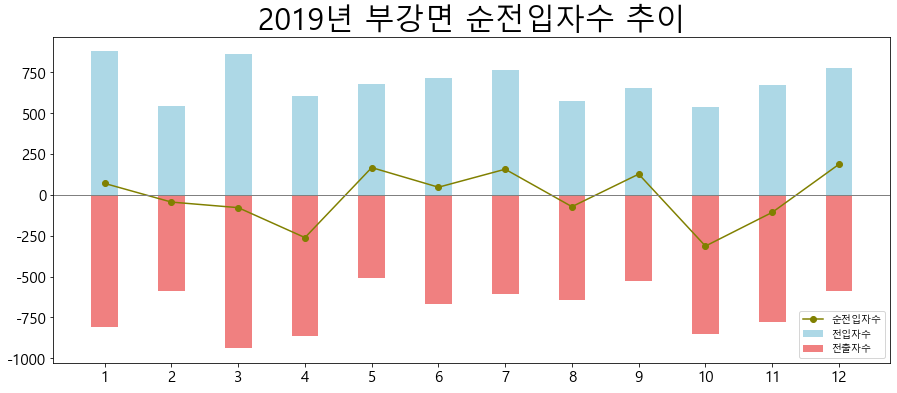

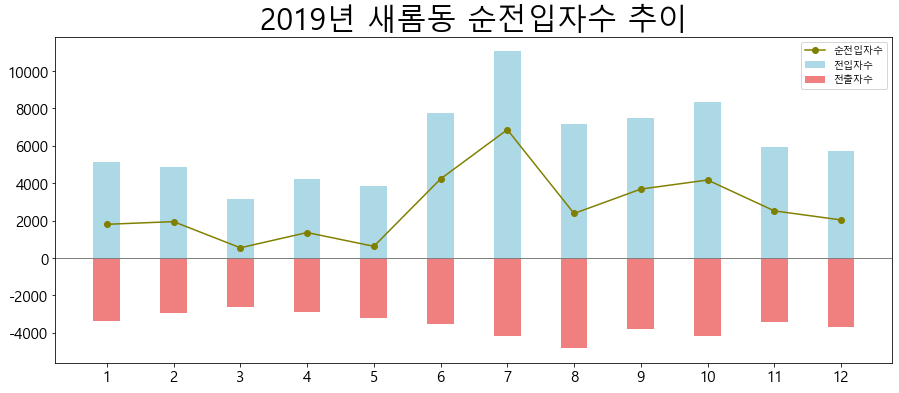

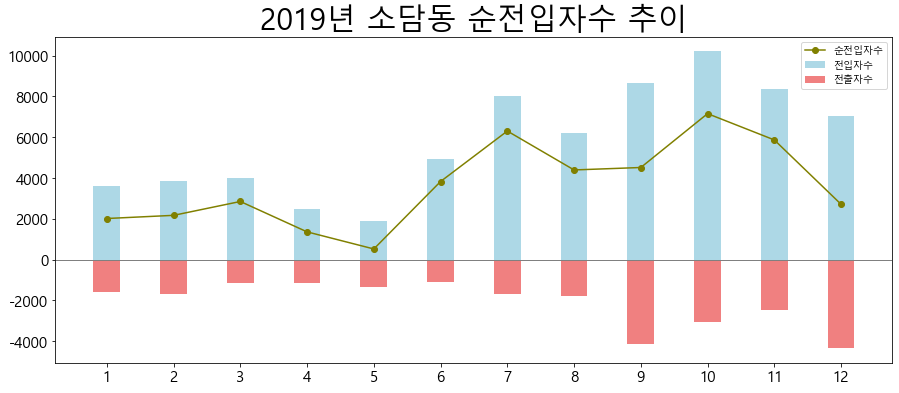

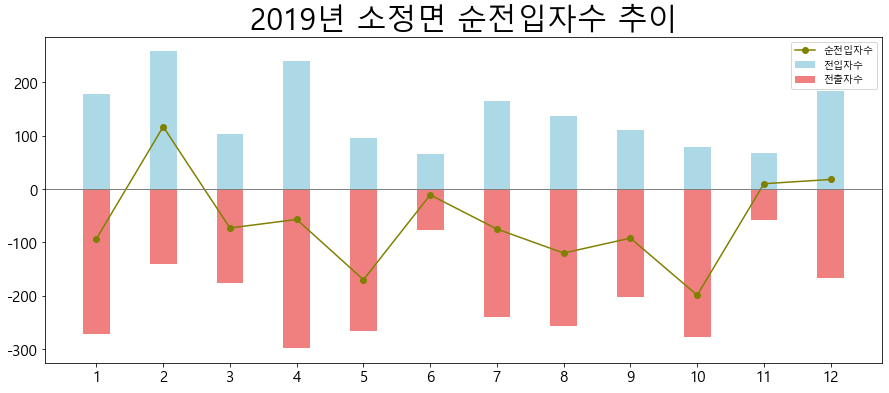

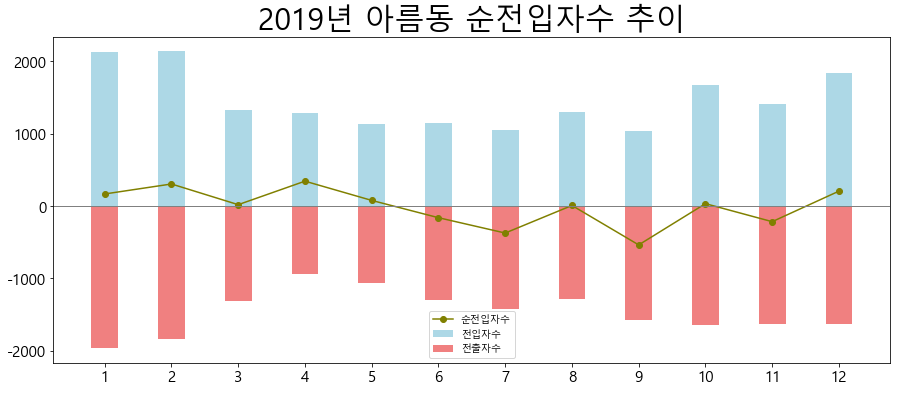

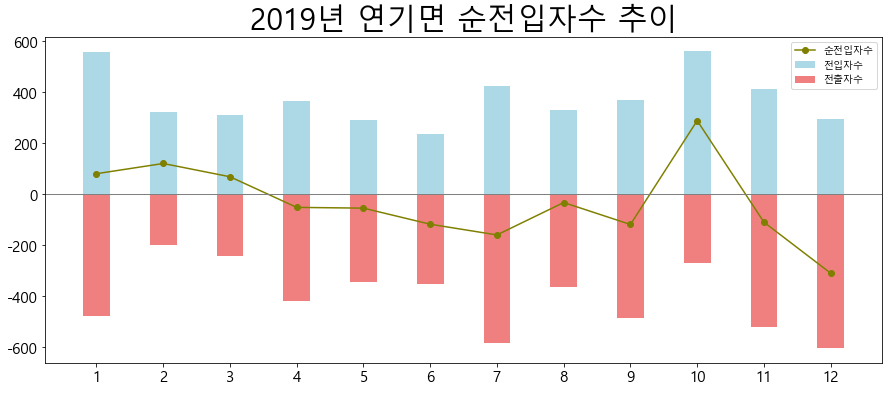

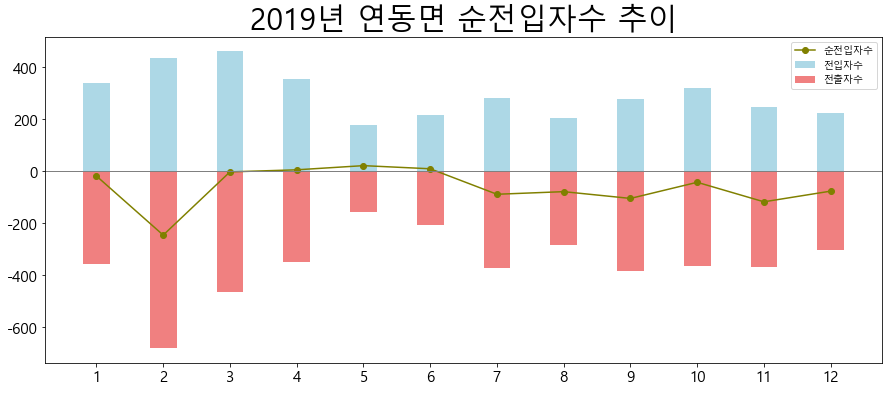

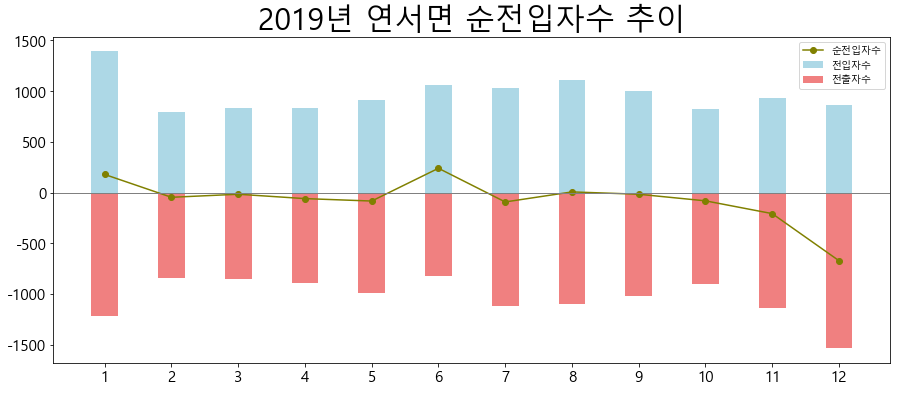

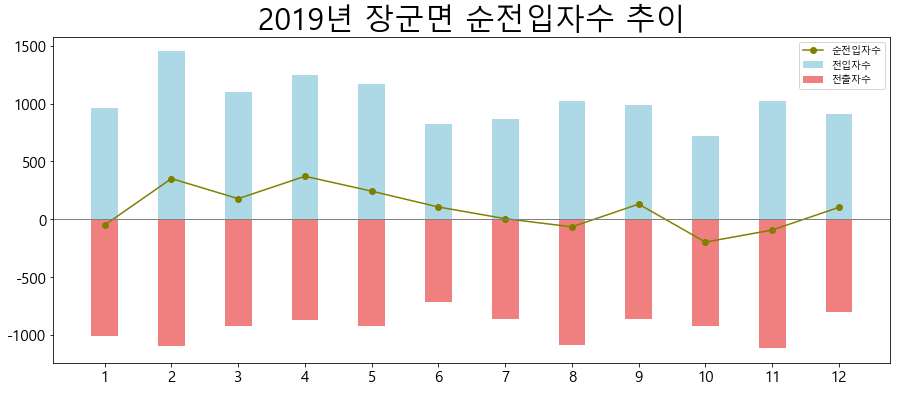

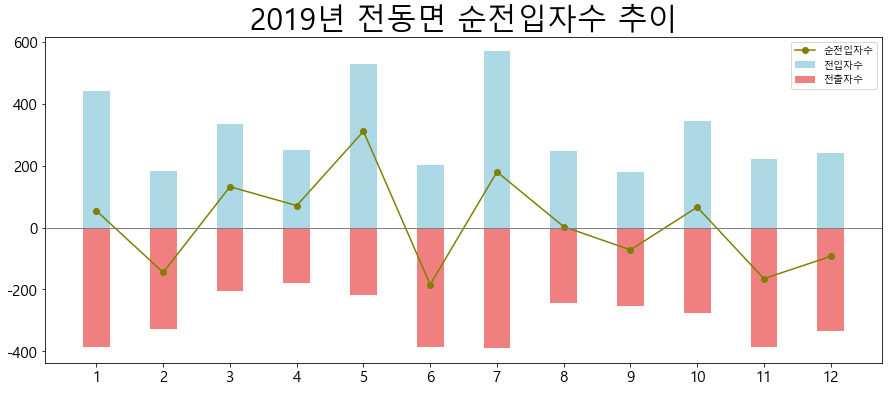

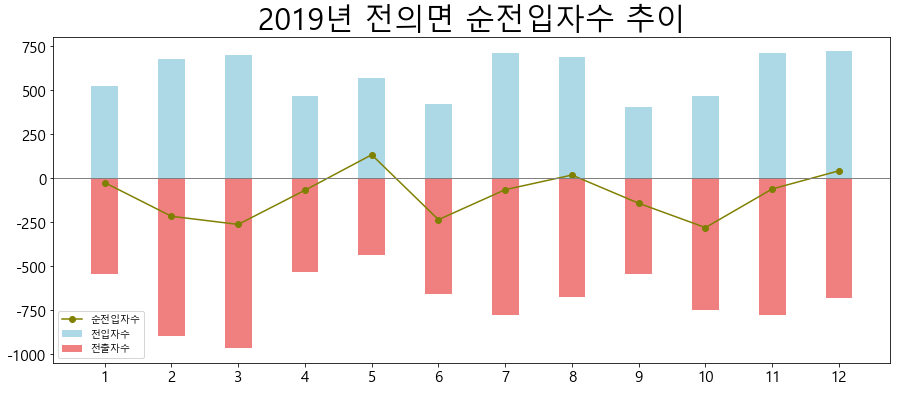

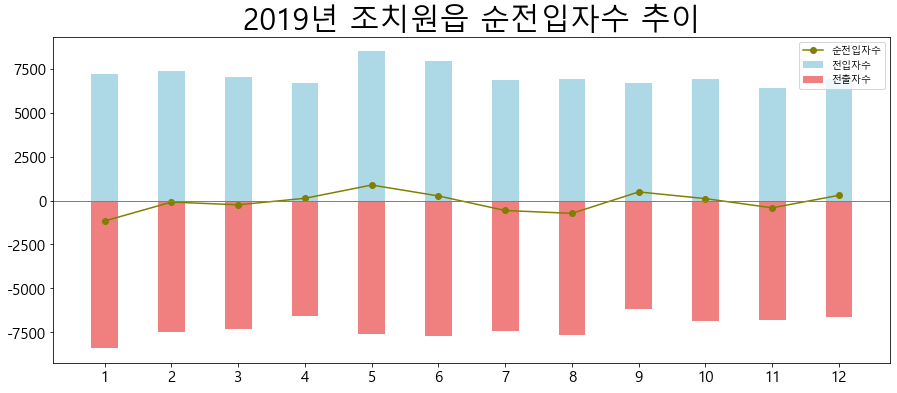

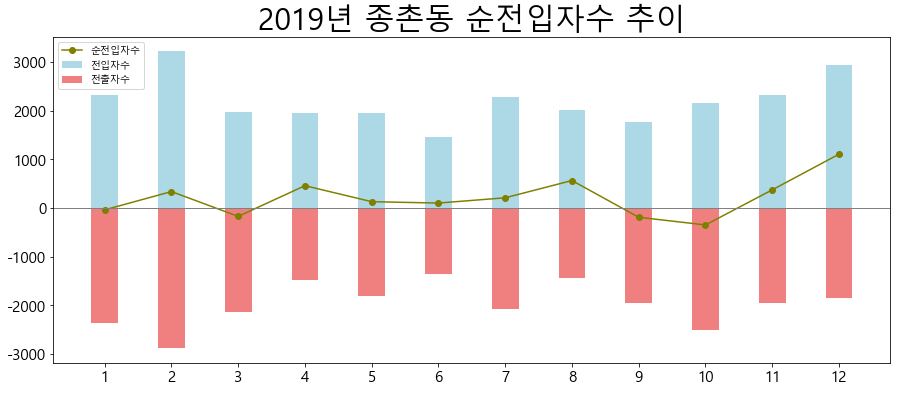

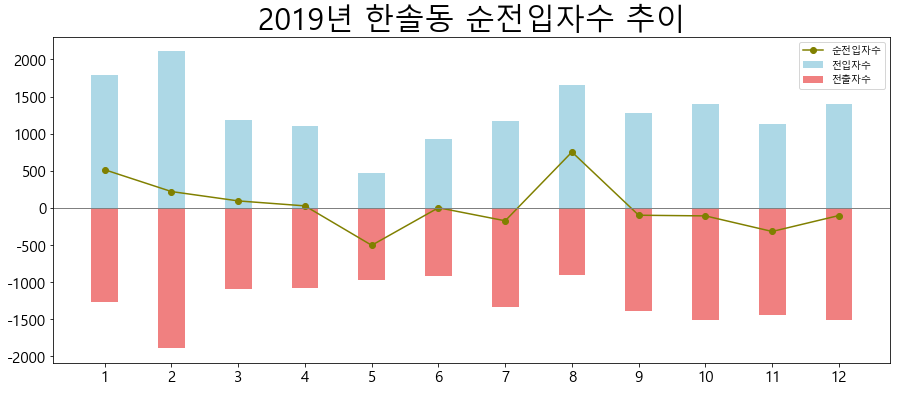

In [83]:
loc_list = ['고운동', '금남면', '대평동', '도담동', '보람동', '부강면', '새롬동', '소담동', '소정면',
            '아름동', '연기면', '연동면', '연서면', '장군면', '전동면', '전의면', '조치원읍', '종촌동',
            '한솔동']

for i,v in enumerate(loc_list):
    df_i = df_2019[df_2019['세종전입행정동'] == v]
    pyplot.figure(figsize=(15,6))
    pyplot.bar(df_i['month'],df_i['전입자수'],color='lightblue',label='전입자수',width=0.4)
    pyplot.bar(df_i['month'],-df_i['전출자수'],color='lightcoral',label='전출자수',width=0.4)
    pyplot.plot(df_i['month'],df_i['순전입자수'],color='olive',label='순전입자수',marker='o')
    plt.axhline(y=0, color='gray', linewidth=1)
    plt.xticks(df_i['month'],fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend()
    plt.title('2019년 {} 순전입자수 추이'.format(v),fontsize=30)
    plt.show()

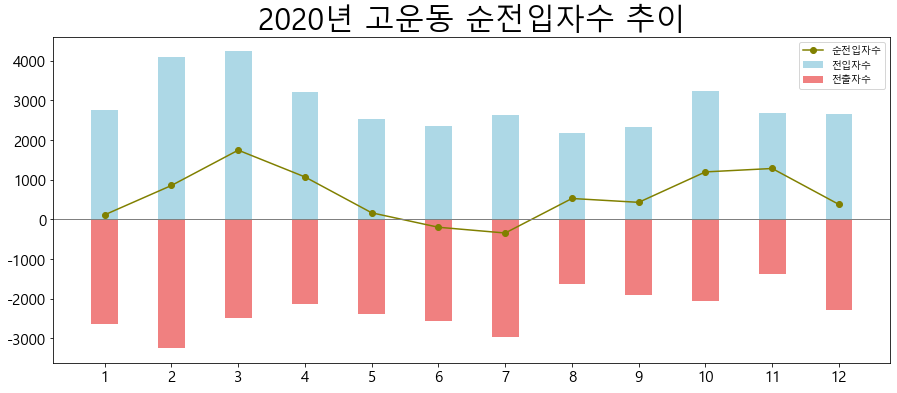

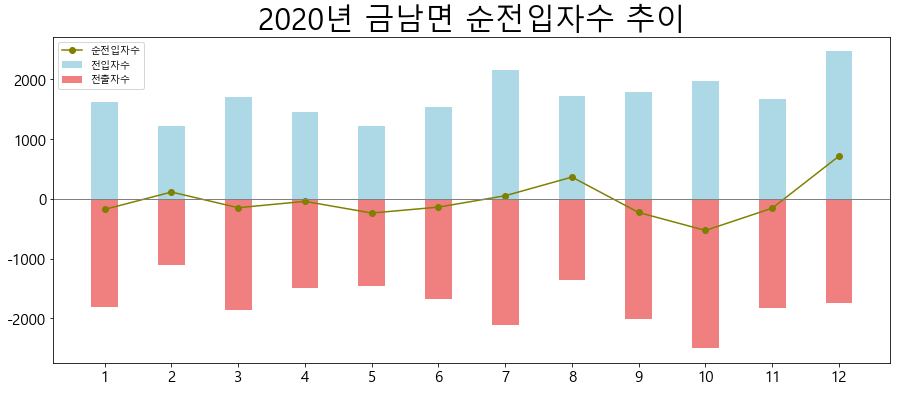

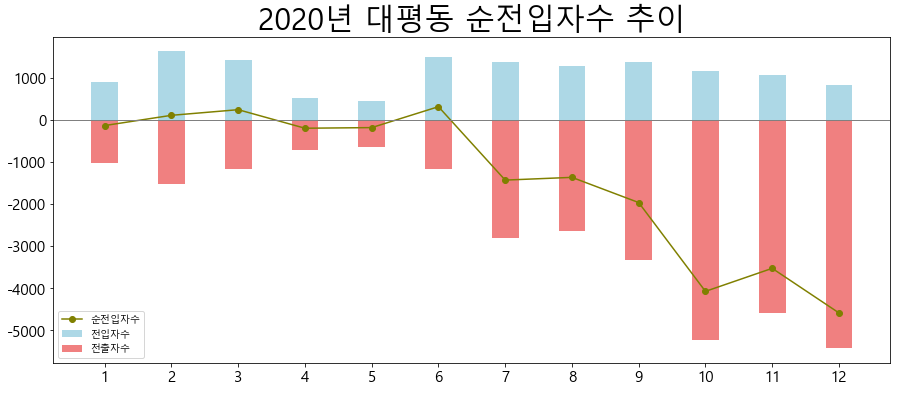

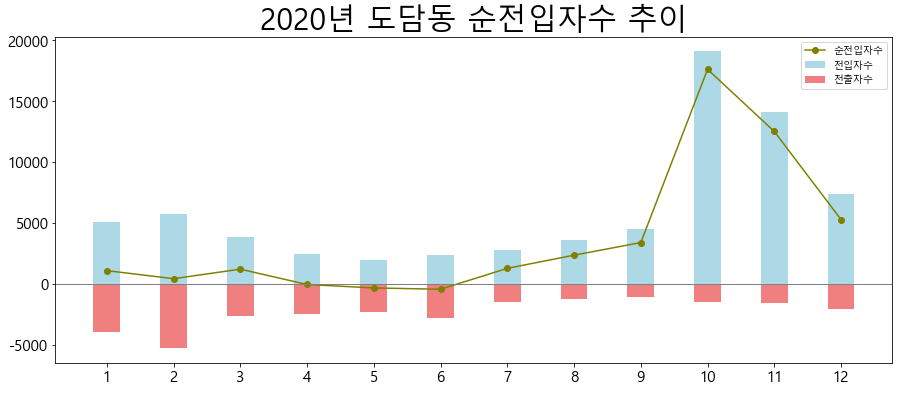

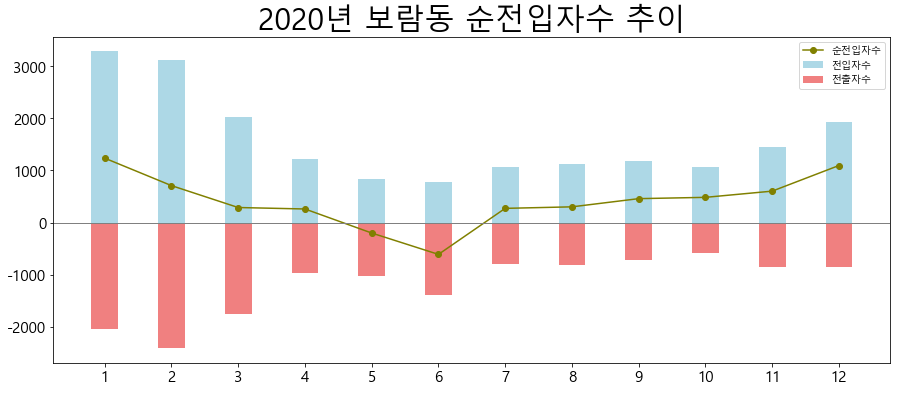

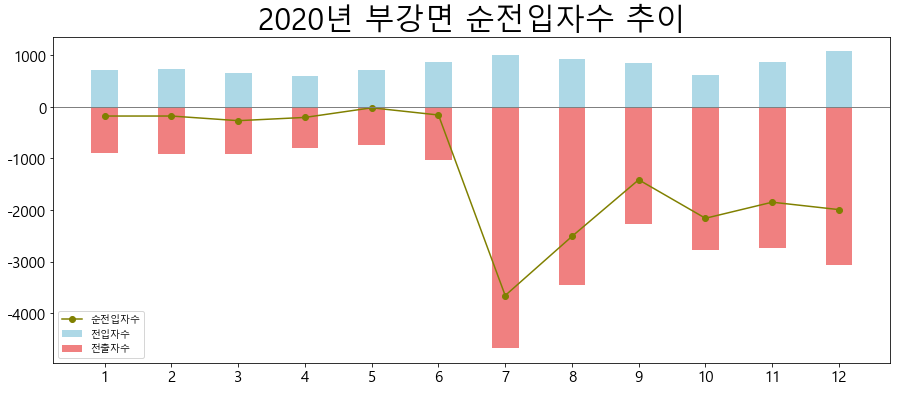

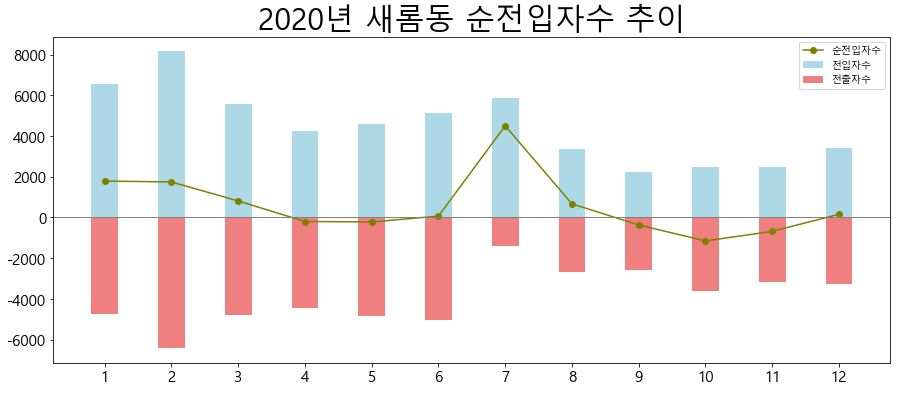

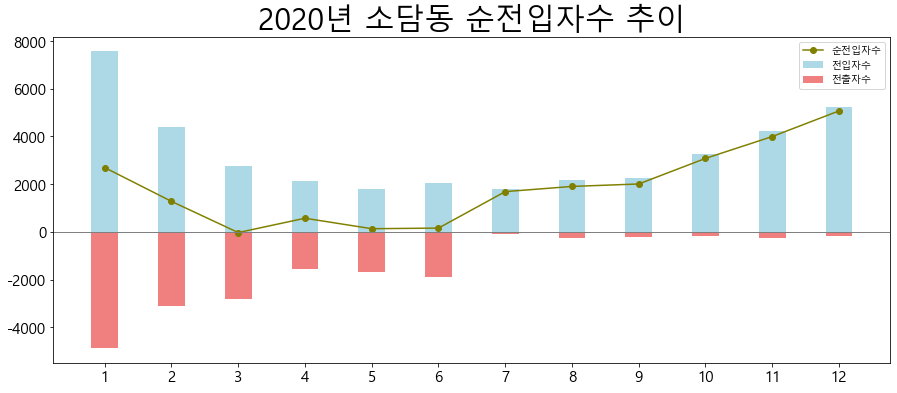

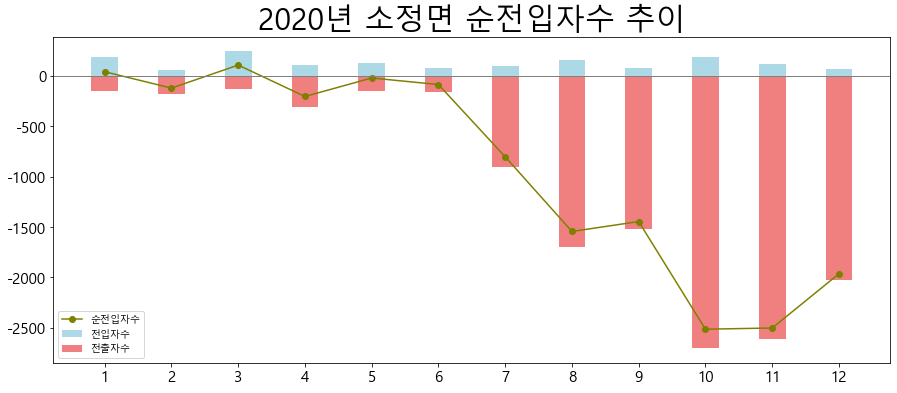

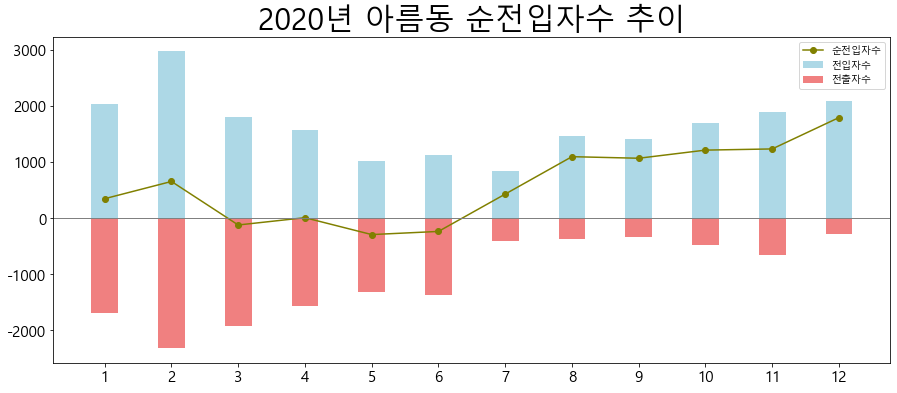

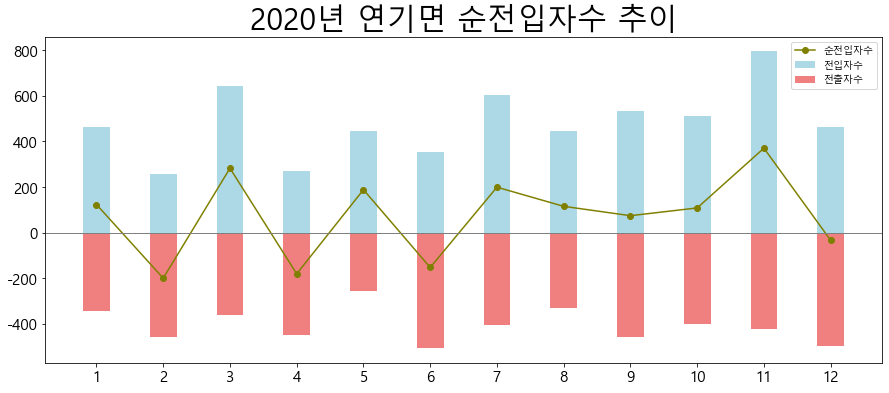

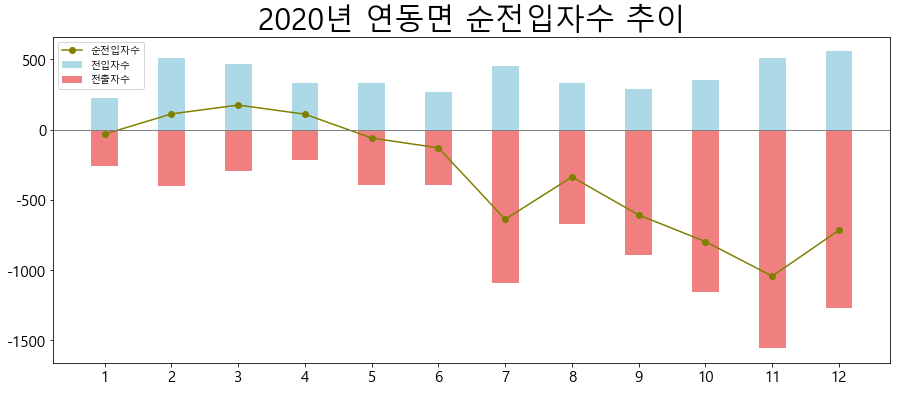

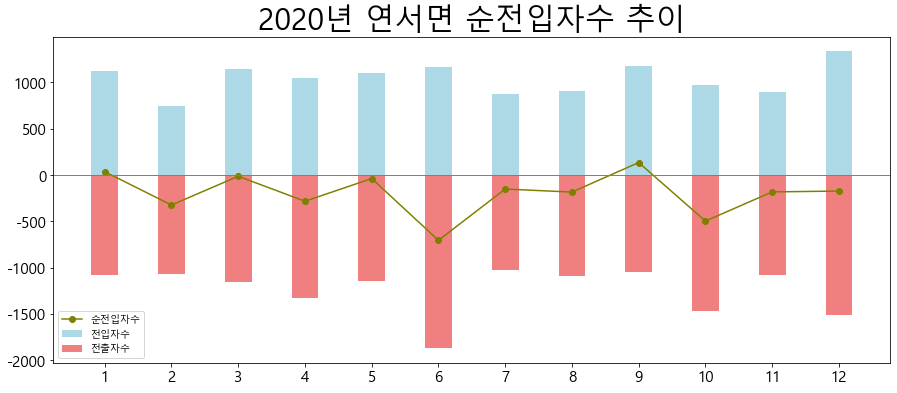

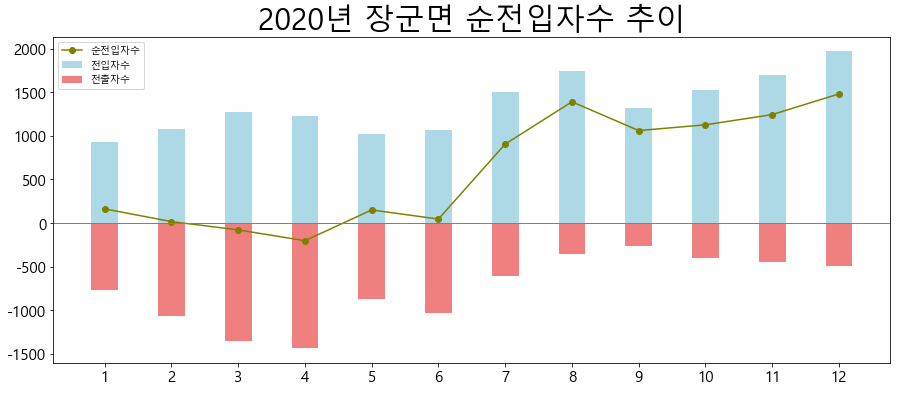

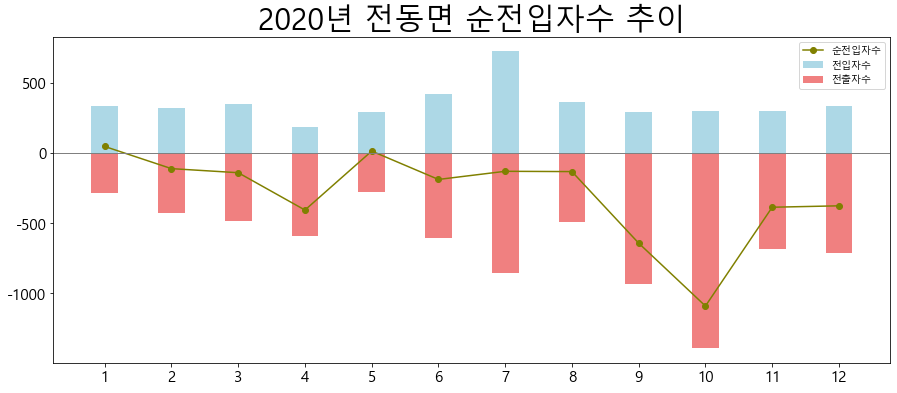

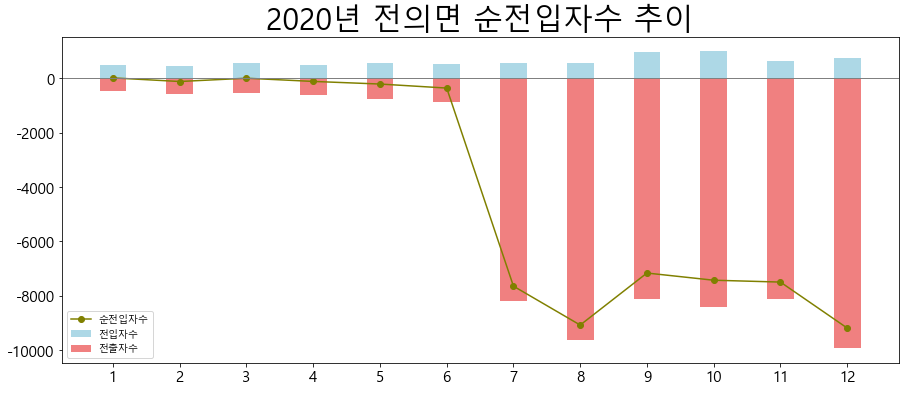

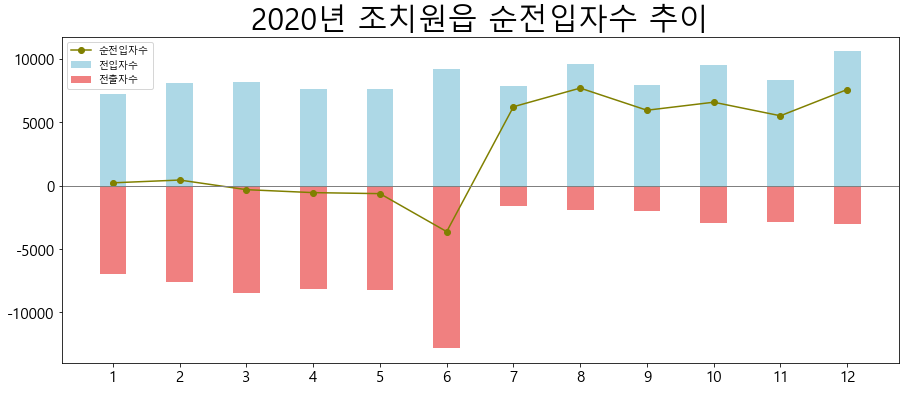

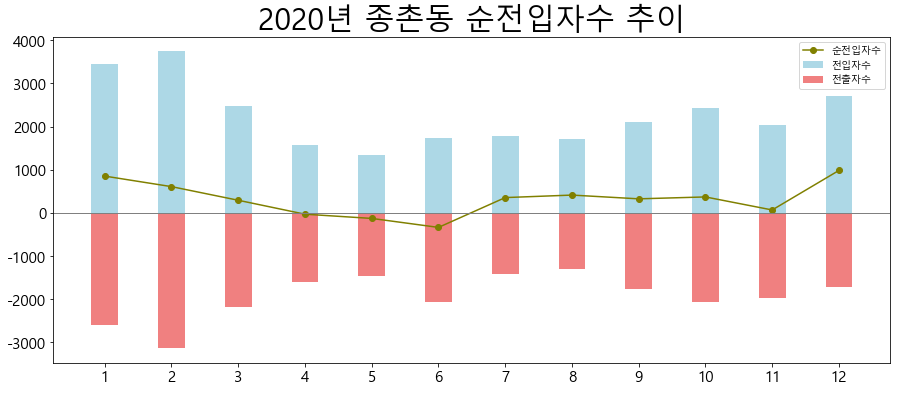

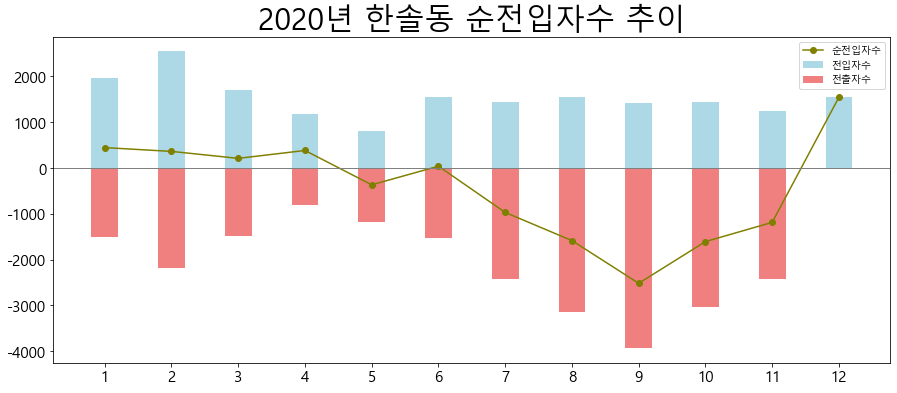

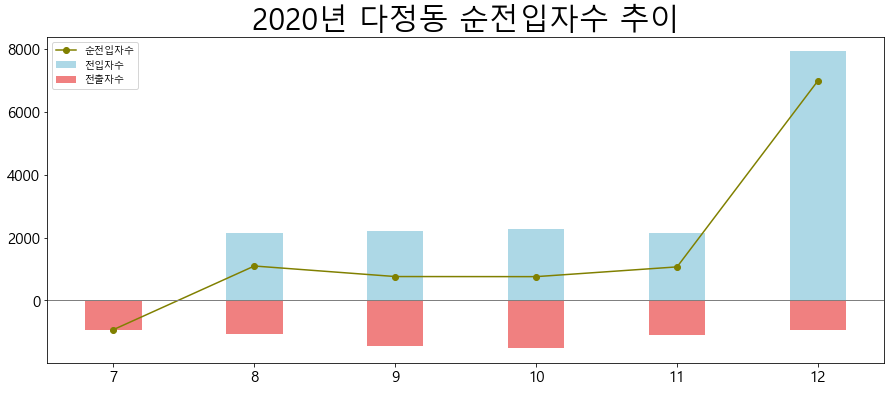

In [84]:
loc_list = ['고운동', '금남면', '대평동', '도담동', '보람동', '부강면', '새롬동', '소담동', '소정면',
            '아름동', '연기면', '연동면', '연서면', '장군면', '전동면', '전의면', '조치원읍', '종촌동',
            '한솔동', '다정동']

for i,v in enumerate(loc_list):
    df_i = df_2020[df_2020['세종전입행정동'] == v]
    pyplot.figure(figsize=(15,6))
    pyplot.bar(df_i['month'],df_i['전입자수'],color='lightblue',label='전입자수',width=0.4)
    pyplot.bar(df_i['month'],-df_i['전출자수'],color='lightcoral',label='전출자수',width=0.4)
    pyplot.plot(df_i['month'],df_i['순전입자수'],color='olive',label='순전입자수',marker='o')
    plt.axhline(y=0, color='gray', linewidth=1)
    plt.xticks(df_i['month'],fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend()
    plt.title('2020년 {} 순전입자수 추이'.format(v),fontsize=30)
    plt.show()

* 2021년의 경우 1월의 데이터만 존재하기 때문에 따로 그래프 도출

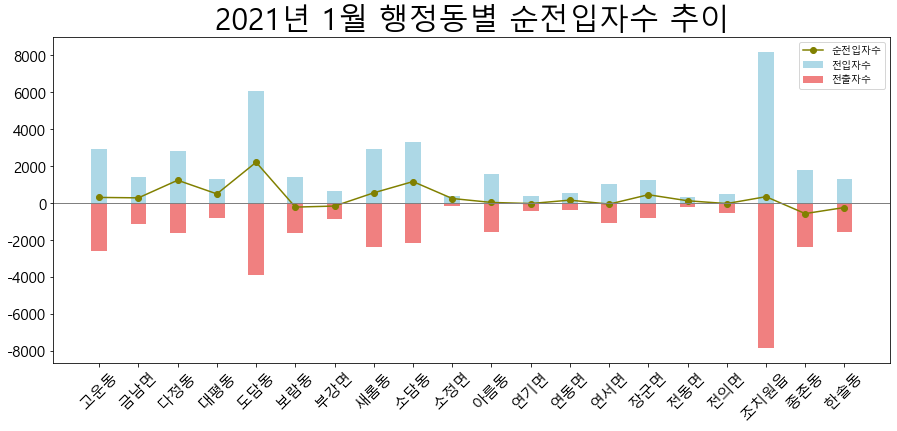

In [85]:
loc_list = ['고운동', '금남면', '다정동', '대평동', '도담동', '보람동', '부강면', '새롬동', '소담동', '소정면', 
            '아름동', '연기면', '연동면', '연서면', '장군면', '전동면', '전의면', '조치원읍', '종촌동', '한솔동']


pyplot.figure(figsize=(15,6))
pyplot.bar(df_2021['세종전입행정동'],df_2021['전입자수'],color='lightblue',label='전입자수',width=0.4)
pyplot.bar(df_2021['세종전입행정동'],-df_2021['전출자수'],color='lightcoral',label='전출자수',width=0.4)
pyplot.plot(df_2021['세종전입행정동'],df_2021['순전입자수'],color='olive',label='순전입자수',marker='o')
plt.axhline(y=0, color='gray', linewidth=1)
plt.title('2021년 1월 행정동별 순전입자수 추이',fontsize=30)
plt.xticks(df_2021['세종전입행정동'], loc_list,fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.legend()
plt.show()